In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
# img = cv2.imread('/content/drive/MyDrive/fhdata/vgi/1cf8f4113cd67d2f7e75b9985c1970d5._std.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.resize(img,(560,900))
# _, result = cv2.threshold(img, 30, 255, cv2.THRESH_BINARY)
# # adp_res = cv2.adaptiveThreshold(img, 255, 
# #                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH BINARY, 41, 5 )
# thresh = cv2.adaptiveThreshold(img, 255,
# 	cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
# cv2_imshow(thresh)
# cv2.waitKey(0)
def image_preprocessing(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(560,900))
  _, result = cv2.threshold(img, 30, 500, cv2.THRESH_BINARY)
  thresh = cv2.adaptiveThreshold(img, 255,
                                 cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
  return thresh

In [ ]:
import cv2
import glob
import os
path = "/content/drive/MyDrive/fhdata/*/*.*"
for file in glob.glob(path):
  img = cv2.imread(file)
  file_name = os.path.basename(file)
  img_preprocessed = image_preprocessing(img)
  # Save the img_preprocessed as a picture with a path matching 'file'
  cv2.imwrite(file, img_preprocessed)
  print(file_name + " preprocessed and saved")

PMI-472081-1_std.jpg preprocessed and saved
PMI-472353-1_std.jpg preprocessed and saved
PMI-472634-1_std.jpg preprocessed and saved
TTP-19-1012_gP2AGft_std.jpg preprocessed and saved
PMI-472353-2_05Y3HcR_std.jpg preprocessed and saved
PMI-472394-1_4N1dKuu_std.jpg preprocessed and saved
PMI-472000-2_std.jpg preprocessed and saved
PMI-472031-2_std.jpg preprocessed and saved
PMI-472031-7_dot__std.jpg preprocessed and saved
Testoil_Invoice_P17036_dot__std_std.jpg preprocessed and saved
PMI-471827-1_std.jpg preprocessed and saved
PMI-475064-1_dot__std.jpg preprocessed and saved
PMI-472031-3_std.jpg preprocessed and saved
PMI-475376-1_std.jpg preprocessed and saved
0000137486_std.jpg preprocessed and saved
maxresdefault._std.jpg preprocessed and saved
PMI-473789-1_dot__std.jpg preprocessed and saved
PMI-474722-1_std.jpg preprocessed and saved
2084024865_std.jpg preprocessed and saved
PMI-476346-1_std.jpg preprocessed and saved
PMI-472131-1_std.jpg preprocessed and saved
PMI-472353-2_std.jpg 

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
base_dir=r"/content/drive/MyDrive/fhdata"

In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=64

#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

NameError: ignored

In [ ]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(4,activation='softmax'))

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(train_datagen,epochs=20,validation_data=test_datagen)

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 1.3597 - accuracy: 0.3594 - val_loss: 1.3288 - val_accuracy: 0.3333
Epoch 2/20
1/1 [==============================] - 4s 4s/step - loss: 1.3364 - accuracy: 0.3594 - val_loss: 1.3148 - val_accuracy: 0.3333
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 1.3272 - accuracy: 0.3594 - val_loss: 1.3185 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 1.3227 - accuracy: 0.4375 - val_loss: 1.3246 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 1.3204 - accuracy: 0.4062 - val_loss: 1.3271 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 1.3106 - accuracy: 0.3750 - val_loss: 1.3267 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 3s 3s/step - loss: 1.3143 - accuracy: 0.3594 - val_loss: 1.3198 - val_accuracy: 0.5000
Epoch 8/20
1/1 [=========================

In [ ]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.models import Sequential, load_model

# Load the dataset
X = []
y = []

path = '/content/drive/MyDrive/fhdata/vbi/*.*'
for file in glob.glob(path):
    # Load the image
    img = cv2.imread(file)
    
    # Resize the image
    img = cv2.resize(img, (64, 64))
    
    X.append(img)
    y.append(0)

path = '/content/drive/MyDrive/fhdata/bi/*.*'
for file in glob.glob(path):
    # Load the image
    img = cv2.imread(file)
    
    # Resize the image
    img = cv2.resize(img, (64, 64))
    
    X.append(img)
    y.append(1)

path = '/content/drive/MyDrive/fhdata/gi/*.*'
for file in glob.glob(path):
    # Load the image
    img = cv2.imread(file)
    
    # Resize the image
    img = cv2.resize(img, (64, 64))
    
    X.append(img)
    y.append(2)

path = '/content/drive/MyDrive/fhdata/vgi/*.*'
for file in glob.glob(path):
    # Load the image
    img = cv2.imread(file)
    
    # Resize the image
    img = cv2.resize(img, (64, 64))
    
    X.append(img)
    y.append(3)

X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 4)
y_test = keras.utils.to_categorical(y_test, 4)

# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add a final output layer with 4 units and a softmax activation for multiclass classification
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

print(X_test)
print(y_test)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)



Epoch 1/10
2/2 [==============================] - 2s 454ms/step - loss: 1.5175 - accuracy: 0.2679 - val_loss: 1.4195 - val_accuracy: 0.2857
Epoch 2/10
2/2 [==============================] - 0s 272ms/step - loss: 1.3787 - accuracy: 0.3214 - val_loss: 1.3544 - val_accuracy: 0.2857
Epoch 3/10
2/2 [==============================] - 0s 235ms/step - loss: 1.3504 - accuracy: 0.3571 - val_loss: 1.3228 - val_accuracy: 0.2857
Epoch 4/10
2/2 [==============================] - 0s 238ms/step - loss: 1.3438 - accuracy: 0.3393 - val_loss: 1.2947 - val_accuracy: 0.2857
Epoch 5/10
2/2 [==============================] - 0s 219ms/step - loss: 1.3439 - accuracy: 0.3929 - val_loss: 1.2719 - val_accuracy: 0.2857
Epoch 6/10
2/2 [==============================] - 0s 279ms/step - loss: 1.3490 - accuracy: 0.4286 - val_loss: 1.2827 - val_accuracy: 0.3571
Epoch 7/10
2/2 [==============================] - 0s 234ms/step - loss: 1.3234 - accuracy: 0.3393 - val_loss: 1.3004 - val_accuracy: 0.2857
Epoch 8/10
2/2 [====

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/extra/model.h5")

In [ ]:
X = []
y = []

img = cv2.imread('/content/drive/MyDrive/extra/birth certificate old/Image_3.jpg')
    
# Resize the image
img = cv2.resize(img, (64, 64))
    
X.append(img.astype("float32") / 255.0)
y.append(0)

X = np.array(X)
y = np.array(y)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/extra/birth certificate old/Image_1.jpg')
    
# Resize the image
img = cv2.resize(img, (64, 64))
    
np.append(Xastype("float32") / 255.0,img,axis=None)
np.append(y,2,axis=None)

X = np.array(X)
y = np.array(y)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/extra/agreement document/Image_11.jpg')
    
# Resize the image
img = cv2.resize(img, (64, 64))
    
np.append(X,img,axis=None)
np.append(y,3,axis=None)

X = np.array(X)
y = np.array(y)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/extra/handwritten invoice/Image_1.jpg')
    
# Resize the image
img = cv2.resize(img, (64, 64))
    
np.append(X,img,axis=None)
np.append(y,1,axis=None)

X = np.array(X)
y = np.array(y)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/extra/handwritten invoice/Image_2.jpg')
    
# Resize the image
img = cv2.resize(img, (64, 64))
    
np.append(X,img,axis=None)
np.append(y,2,axis=None)

X = np.array(X)
y = np.array(y)

In [ ]:
X = X
y = keras.utils.to_categorical(y, 4)

SyntaxError: ignored

In [ ]:
test_loss, test_acc = model.evaluate(X, y)
print("Test accuracy:", test_acc)

1/1 [==============================] - 0s 34ms/step - loss: 1.2851 - accuracy: 0.0000e+00
Test accuracy: 0.0


In [ ]:
# from sklearn.model_selection import KFold

# # Split the data into k folds
# k = 5
# kf = KFold(n_splits=k)

# # Initialize arrays to store the results of each fold
# accuracies = []
# losses = []

# # Loop over each fold
# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     # Build the model
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(128, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(4, activation='softmax'))
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
#     # Train the model
#     history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
    
#     # Evaluate the model on the test set
#     test_loss, test_acc = model.evaluate(X_test, y_test)
#     print("Fold accuracy:", test_acc)
#     accuracies.append(test_acc)
#     losses.append(test_loss)

# # Calculate the average accuracy and loss over all folds
# avg_acc = np.mean(accuracies)
# avg_loss = np.mean(losses)
# print("Average accuracy:", avg_acc)
# print("Average loss:", avg_loss)


Epoch 1/10


ValueError: ignored

In [ ]:
# import cv2
# import numpy as np
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import glob

# # Load the dataset
# X = []
# y = []
# path = "/content/drive/MyDrive/fhdata/*/*.*"
# i=1
# for file in glob.glob(path):
#     # Load the image
#     img = cv2.imread(file)
    
#     # Extract color histograms
#     hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
#     hist = cv2.normalize(hist, hist).flatten()
    
#     X.append(hist)
#     y.append(i)
#     i = i+1

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the classifier
# clf = SVC(kernel='linear')
# clf.fit(X_train, y_train)

# # Predict on the test set
# y_pred = clf.predict(X_test)

# print(X_test)

# # Evaluate the classifier
# acc = accuracy_score(y_test, y_pred)
# print("Accuracy:", acc)


[array([0.16209047, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.    

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2

170498071/170498071 [==============================] - 63s 0us/step


In [ ]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

input_dir = '/content/drive/MyDrive/images1'
categories = ['bi', 'gi','vbi','vgi']

data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = imread(img_path)
        img = resize(img, (50, 50))
        data.append(img.flatten())
        labels.append(category_idx)

data = np.asarray(data)
labels = np.asarray(labels)

# train / test split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

<ipython-input-47-d8af97298ad4>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data)


In [ ]:
x_train.shape,x_test.shape

((58,), (15,))

In [ ]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier()

In [ ]:
# model.fit(x_train,y_train)
x_train

array([array([0.00357485, 0.00357485, 0.00357485, ..., 0.00321507, 0.00321507,
              0.00321507])                                                    ,
       array([0.00383591, 0.00385021, 0.00385236, ..., 0.00388205, 0.00388312,
              0.00387543])                                                    ,
       array([0.00329642, 0.00326567, 0.00328017, ..., 0.00363327, 0.00363327,
              0.00363327])                                                    ,
       array([0.00297101, 0.00287582, 0.00098085, ..., 0.00315509, 0.00384254,
              0.00389081])                                                    ,
       array([0.00390619, 0.00390619, 0.00389081, ..., 0.00387928, 0.00302345,
              0.0029504 ])                                                    ,
       array([0.00287582, 0.00287582, 0.00287582, ..., 0.0037524 , 0.0037524 ,
              0.0037524 ])                                                    ,
       array([0.0030842 , 0.0030842 , 0.003084

In [ ]:
# Library for plotting the images and the loss function
import matplotlib.pyplot as plt

# We import the data set from tensorflow and build the model there
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Download the data set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

IndexError: ignored

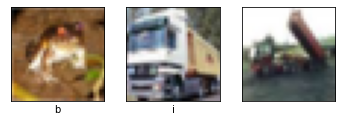

In [ ]:
# Define the 10 image classes
class_names = ['bi', 'gi', 'vbi', 'vgi']

# Show the first 10 images
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # Die CIFAR Labels sind Arrays, deshalb benötigen wir den extra Index
    plt.xlabel(class_names[0][i])
plt.show()

In [ ]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir /content/drive/MyDrive/extra

In [ ]:
from bing_image_downloader import downloader 
downloader.download ("handwritten invoice",limit=14,output_dir='/content/drive/MyDrive/extra')

[%] Downloading Images to /content/drive/MyDrive/extra/handwritten invoice


[!!]Indexing page: 1

[%] Indexed 14 Images on Page 1.


[%] Downloading Image #1 from https://i.stack.imgur.com/flW4Y.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://teach-ict.com/gcse_new/software/word_processor/miniweb/images/invoice1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/b3/b3/52/b3b352e2d6d2eafa91ac6d1e53f60157.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/736x/ee/6f/29/ee6f29d09206d9e6ee974ab677e127bb.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://paperfreeinvoice.com/wp-content/uploads/2011/05/handwritten_invoice3.jpg.scaled500.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://apcc2017.com/wp-content/uploads/2018/08/handwritten-invoice-template-sample-service-template-signature-printed.jpg
[!] Issue getting: http://apcc2017.com/wp-content/uploads/2018/08/handwritten-invoice-te

In [ ]:
from bing_image_downloader import downloader 
downloader.download ("birth certificate old",limit=6,output_dir='/content/drive/MyDrive/extra')

[%] Downloading Images to /content/drive/MyDrive/extra/birth certificate old


[!!]Indexing page: 1

[%] Indexed 6 Images on Page 1.


[%] Downloading Image #1 from https://jlb2011.co.uk/flbbiog/birthcrt.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://assets.atlasobscura.com/article_images/23863/image.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://1.bp.blogspot.com/-NlQse0ktuuU/Wm9X3VdTG5I/AAAAAAAAMzQ/KcqpF8aa1J86alhosxvT43CvHuDPnj5oACLcBGAs/s1600/Birth%2BCertificate%2Baddress.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://media.iwm.org.uk/pdm/ciim-media/45/967/238/large_45967238.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.mocklog.com/.a/6a00d834515e5769e2014e87ea1885970d-500wi
[%] File Downloaded !

[%] Downloading Image #6 from http://1.bp.blogspot.com/-u3_YUsoerbE/UwqEjL2d_BI/AAAAAAAACHs/sMUSIOkFwWA/s1600/BirthCertificateFragment.JPG
[%] File Downloaded !



[%] Done. Downloaded 6 images.


In [ ]:

from bing_image_downloader import downloader 
downloader.download ("old attestation",limit=6,output_dir='/content/drive/MyDrive/extra')



[%] Downloading Images to /content/drive/MyDrive/extra/old attestation


[!!]Indexing page: 1

[%] Indexed 6 Images on Page 1.


[%] Downloading Image #1 from http://3.bp.blogspot.com/-OiIscHwb21o/Th0OLKazXDI/AAAAAAAAAEM/sgNVPXxmzFc/w1200-h630-p-k-no-nu/Attestation+Paper+page+1.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://3.bp.blogspot.com/-OiIscHwb21o/Th0OLKazXDI/AAAAAAAAAEM/sgNVPXxmzFc/s640/Attestation+Paper+page+1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.whrde.edu.in/wp-content/uploads/2020/01/a1.jpeg
[%] File Downloaded !

[%] Downloading Image #4 from http://allattestation.com/blog/wp-content/uploads/2017/01/certificate-attestation.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://s3.scoopwhoop.com/anj/chunk/163458505.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.ccpdt.org/wp-content/uploads/2019/11/Attestation-Statement-pdf.jpg
[%] File Downloaded !



[%] Done. Downloaded 6 images.


In [ ]:
from bing_image_downloader import downloader 
downloader.download ("Patent Document",limit=8,output_dir='/content/drive/MyDrive/extra')

[%] Downloading Images to /content/drive/MyDrive/extra/Patent Document


[!!]Indexing page: 1

[%] Indexed 8 Images on Page 1.


[%] Downloading Image #1 from https://image.slidesharecdn.com/15dbf369-7c16-4c13-a488-d03fb7f9d8ec-150825222756-lva1-app6892/95/patent-document-3-638.jpg?cb=1440541742
[%] File Downloaded !

[%] Downloading Image #2 from http://i2.wp.com/patentfile.org/wp-content/uploads/2012/03/reviews-4.jpg?resize=707%2C240
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/236x/33/38/38/333838a60b40331be0828210718a7b09.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://bainwoodhuang.com/wp-content/uploads/2011/04/sample-patent-5.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.benwiens.com/patent4.gif
[%] File Downloaded !

[%] Downloading Image #6 from https://www.patent-search-information.com/images/utility-patent.gif
[!] Issue getting: https://www.patent-search-information.com/images/utility-patent.gif
[!] Error:: <

In [ ]:
from bing_image_downloader import downloader 
downloader.download ("Patent Document",limit=8,output_dir='/content/drive/MyDrive/extra')

In [ ]:
from bing_image_downloader import downloader 
downloader.download ("agreement document",limit=15,output_dir='/content/drive/MyDrive/extra')

[%] Downloading Images to /content/drive/MyDrive/extra/agreement document


[!!]Indexing page: 1

[%] Indexed 14 Images on Page 1.


[%] Downloading Image #1 from http://www.sampletemplatess.com/wp-content/uploads/2018/02/free-personal-loan-agreement-template-ygnqd-lovely-free-printable-personal-loan-agreement-form-generic-of-free-personal-loan-agreement-template-egqxf.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/736x/d0/01/a6/d001a6c0b235ef920666ab65f39d5db4.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://images.creativetemplate.net/wp-content/uploads/2018/03/Sample-Agreement-Form-Template.png
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/736x/1a/e5/08/1ae508e5e899f5f163c7e6403477a8d2.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://images.template.net/wp-content/uploads/2017/05/a2.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/736x/90/a2/05/90a205a8134dd12e7c4d

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-deu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 40.2 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-deu tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 21 not upgraded.
Need to get 5,595 kB of archives.
After this operation, 17.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Get:4 http://archive.ubuntu.com/ubuntu fo

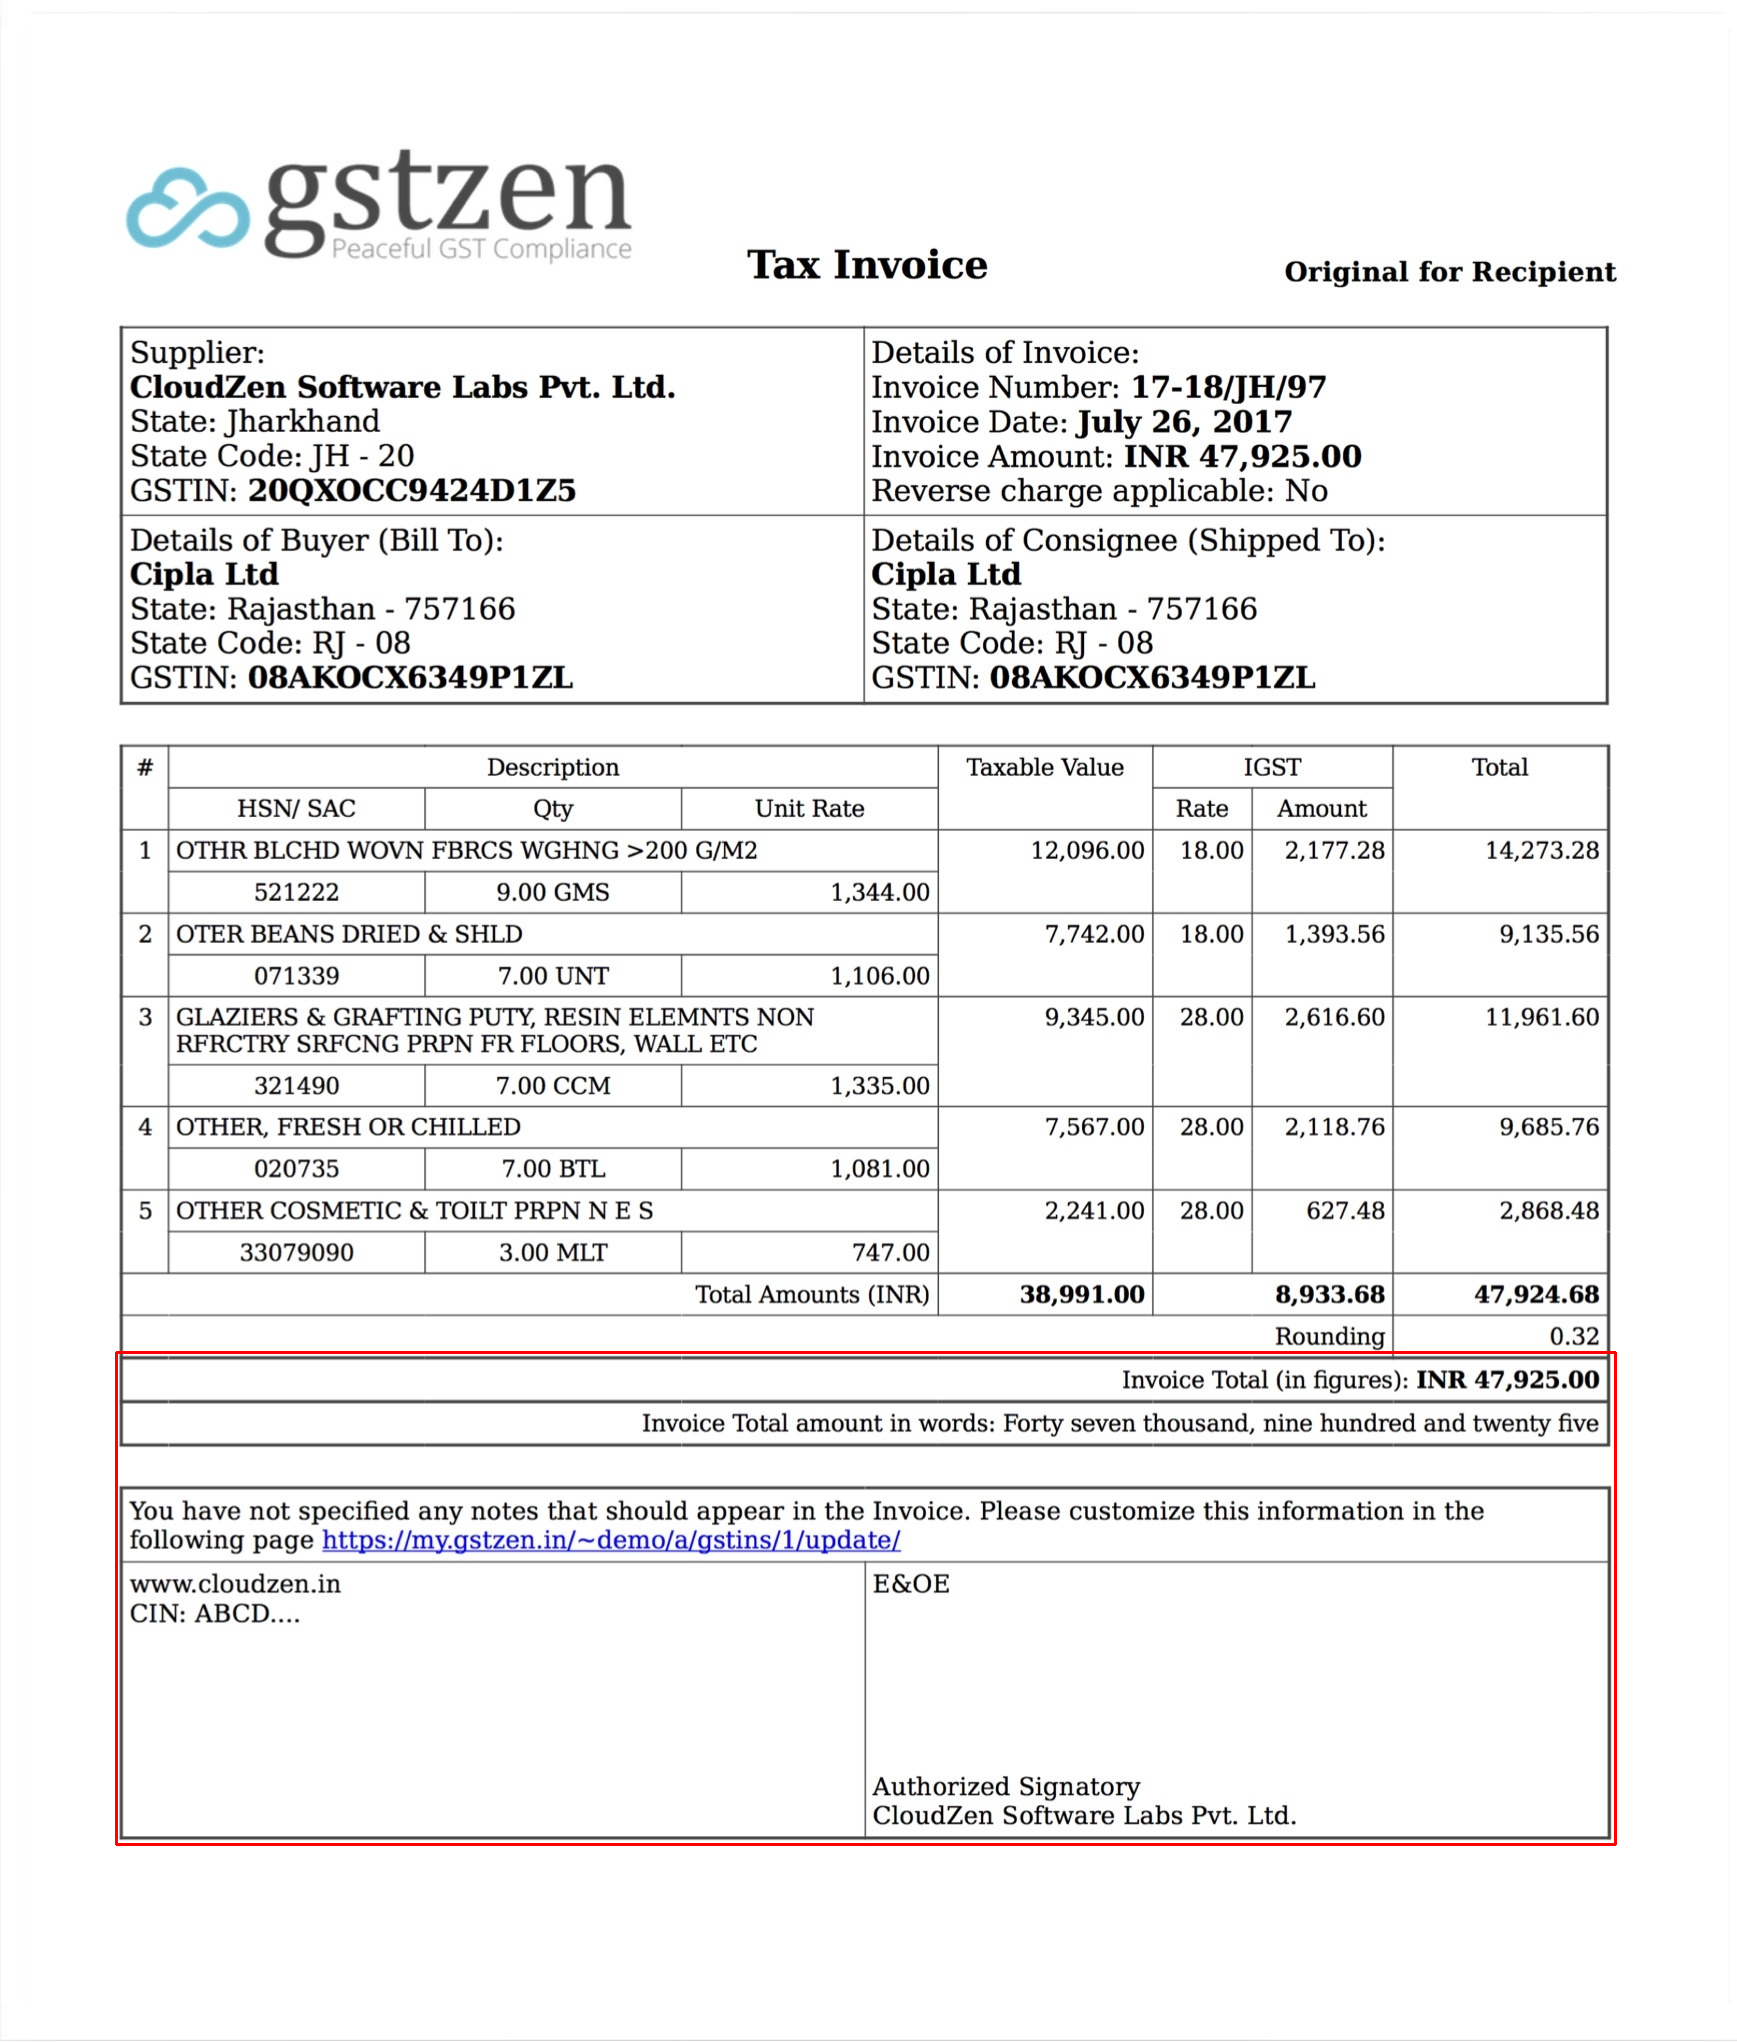

In [ ]:
import pytesseract
from pytesseract import Output
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/images1/vgi/invoice-sample-copy._std.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

cv2_imshow(img)

In [ ]:
extracted_text = pytesseract.image_to_string(img, lang = 'deu')

In [ ]:
import pickle
DATA_PATH = "/content/drive/MyDrive"
infile = open(DATA_PATH+'/projectname (1).pickle','rb')
best_model2 = pickle.load(infile)

best_model2.fit(X_train, y_train)

AttributeError: ignored